In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv


In [2]:
df_train = pd.read_csv("../input/tabular-playground-series-jul-2021/train.csv")
df_test = pd.read_csv("../input/tabular-playground-series-jul-2021/test.csv")
sample_df = pd.read_csv("../input/tabular-playground-series-jul-2021/sample_submission.csv")

In [3]:
df_train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [4]:
df_test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [5]:
sample_df.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.0,10.0,300.0
1,2011-01-01 01:00:00,2.0,10.0,300.0
2,2011-01-01 02:00:00,2.0,10.0,300.0
3,2011-01-01 03:00:00,2.0,10.0,300.0
4,2011-01-01 04:00:00,2.0,10.0,300.0


In [6]:
df_train.shape

(7111, 12)

In [7]:
df_test.shape

(2247, 9)

In [8]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 9 

In [9]:
# df_train['date_time'] = pd.to_datetime(df_train['date_time'], infer_datetime_format=True)
# df_test['date_time'] = pd.to_datetime(df_test['date_time'], infer_datetime_format=True)


In [10]:
corr = df_train[["target_carbon_monoxide","target_benzene","target_nitrogen_oxides"]].corr()
corr

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
target_carbon_monoxide,1.000000,0.881884,0.806099
target_benzene,0.881884,1.000000,0.664235
target_nitrogen_oxides,0.806099,0.664235,1.000000


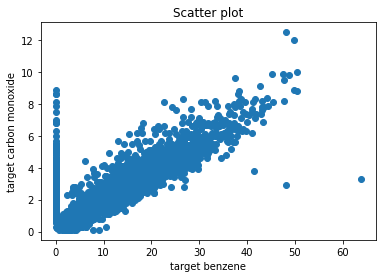

In [11]:
plt.scatter(df_train["target_benzene"], df_train["target_carbon_monoxide"])
plt.title('Scatter plot')
plt.xlabel('target benzene')
plt.ylabel('target carbon monoxide')
plt.show()


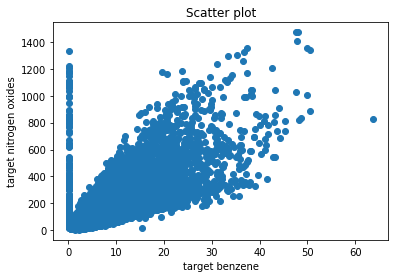

In [12]:
plt.scatter(df_train["target_benzene"], df_train["target_nitrogen_oxides"])
plt.title('Scatter plot')
plt.xlabel('target benzene')
plt.ylabel('target nitrogen oxides')
plt.show()

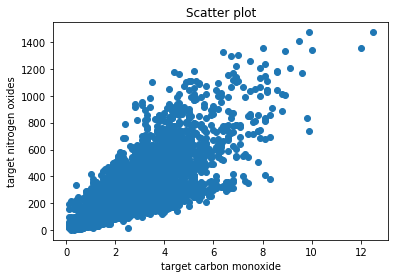

In [13]:
plt.scatter(df_train["target_carbon_monoxide"], df_train["target_nitrogen_oxides"])
plt.title('Scatter plot')
plt.xlabel('target carbon monoxide')
plt.ylabel('target nitrogen oxides')
plt.show()

In [14]:
df_train['month'] = pd.to_datetime(df_train['date_time']).dt.month
df_train['hour'] = pd.to_datetime(df_train['date_time']).dt.hour
df_train['day'] = pd.to_datetime(df_train['date_time']).dt.day

In [15]:
df_test['month'] = pd.to_datetime(df_test['date_time']).dt.month
df_test['hour'] = pd.to_datetime(df_test['date_time']).dt.hour
df_test['day'] = pd.to_datetime(df_test['date_time']).dt.day

In [16]:
df_train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour,day
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3,18,10
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,3,19,10
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,3,20,10
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,3,21,10
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,3,22,10


In [17]:
df_train.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour,day
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784,7.647166,11.505977,16.144705
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723,2.802293,6.925721,8.758778
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000,1.000000,0.000000,1.000000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000,5.000000,6.000000,9.000000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000,8.000000,12.000000,16.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000,10.000000,18.000000,24.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000,12.000000,23.000000,31.000000


In [18]:
df_test.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,month,hour,day
count,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.00000,2247.000000
mean,10.808144,51.031242,0.627053,1106.534490,836.459769,828.321495,1104.850601,1029.851535,2.077437,11.46996,15.022697
std,6.444497,16.665047,0.266588,205.341455,272.816585,339.511779,293.112225,434.863287,0.900808,6.91932,8.916698
min,-1.800000,9.800000,0.184700,665.900000,356.200000,320.100000,523.400000,218.800000,1.000000,0.00000,1.000000
25%,5.600000,36.900000,0.413350,951.500000,640.700000,597.050000,899.450000,688.550000,1.000000,5.00000,7.000000
50%,9.800000,50.600000,0.596400,1080.400000,800.800000,757.100000,1076.200000,973.100000,2.000000,11.00000,15.000000
75%,14.200000,63.550000,0.804950,1222.100000,1016.100000,944.950000,1288.350000,1324.000000,3.000000,17.00000,23.000000
max,30.900000,88.800000,1.393000,1882.900000,1776.100000,1975.000000,2211.400000,2593.800000,4.000000,23.00000,31.000000


In [19]:
df_train.groupby("month").count()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,hour,day
month,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,510,510,510,510,510,510,510,510,510,510,510,510,510,510
4,720,720,720,720,720,720,720,720,720,720,720,720,720,720
5,744,744,744,744,744,744,744,744,744,744,744,744,744,744
6,720,720,720,720,720,720,720,720,720,720,720,720,720,720
7,744,744,744,744,744,744,744,744,744,744,744,744,744,744
8,744,744,744,744,744,744,744,744,744,744,744,744,744,744
9,720,720,720,720,720,720,720,720,720,720,720,720,720,720
10,744,744,744,744,744,744,744,744,744,744,744,744,744,744


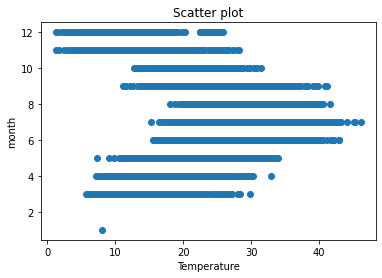

In [20]:
plt.scatter(df_train["deg_C"], df_train["month"])
plt.title('Scatter plot')
plt.xlabel('Temperature')
plt.ylabel('month')
plt.show()

In [21]:
df_train["seasonal_division"] = df_train.month

In [22]:
df_train.loc[(df_train["month"] <= 5), ["seasonal_division"]] = 1
df_train.loc[(df_train["month"] >= 6) & (df_train["month"] < 9), ["seasonal_division"]] = 2
df_train.loc[(df_train["month"] >= 9) & (df_train["month"] <= 10), ["seasonal_division"]] = 3
df_train.loc[(df_train["month"] >= 10), ["seasonal_division"]] = 4

In [23]:
df_train.groupby("seasonal_division").count()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour,day
seasonal_division,,,,,,,,,,,,,,,
1,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720
4,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208


In [24]:
df_test["seasonal_division"] = df_test.month
df_test.loc[(df_test["month"] <= 5), ["seasonal_division"]] = 1
df_test.loc[(df_test["month"] >= 6) & (df_test["month"] < 9), ["seasonal_division"]] = 2
df_test.loc[(df_test["month"] >= 9) & (df_test["month"] <= 10), ["seasonal_division"]] = 3
df_test.loc[(df_test["month"] >= 10), ["seasonal_division"]] = 4

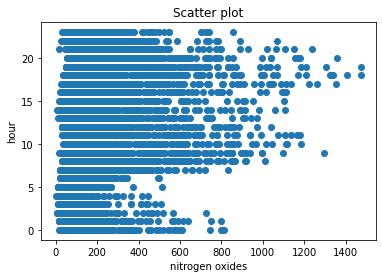

In [25]:
plt.scatter(df_train["target_nitrogen_oxides"], df_train["hour"])
plt.title('Scatter plot')
plt.xlabel('nitrogen oxides')
plt.ylabel('hour')
plt.show()

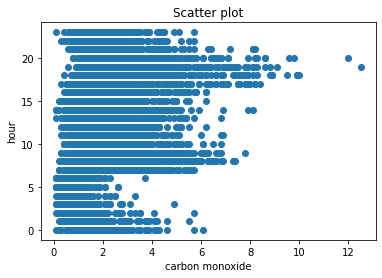

In [26]:
plt.scatter(df_train["target_carbon_monoxide"], df_train["hour"])
plt.title('Scatter plot')
plt.xlabel('carbon monoxide')
plt.ylabel('hour')
plt.show()

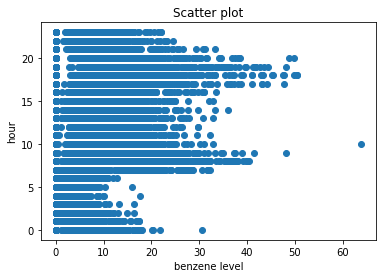

In [27]:
plt.scatter(df_train["target_benzene"], df_train["hour"])
plt.title('Scatter plot')
plt.xlabel('benzene level')
plt.ylabel('hour')
plt.show()

In [28]:
df_test["hourly_division"] = df_test.hour
df_test.loc[(df_test["hour"] <= 6), ["hourly_division"]] = 0
df_test.loc[(df_test["hour"] > 6), ["hourly_division"]] = 1

In [29]:
df_train["hourly_division"] = df_test.hour
df_train.loc[(df_train["hour"] <= 6), ["hourly_division"]] = 0
df_train.loc[(df_train["hour"] > 6), ["hourly_division"]] = 1

In [30]:
df_train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour,day,seasonal_division,hourly_division
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3,18,10,1,1.0
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,3,19,10,1,1.0
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,3,20,10,1,1.0
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,3,21,10,1,1.0
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,3,22,10,1,1.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import *

In [32]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train):
    model = DecisionTreeRegressor(max_leaf_nodes= max_leaf_nodes , random_state=0)
    model.fit(x_train, y_train,)
    preds_val_1 = model.predict(x_test)
#     mae = mean_absolute_error(y_test, preds_val)
#     r_square = (round(r2_score(y_test,preds_val)*100, 2))
    return preds_val_1

def DecisionTreereg(train_features, train_label, test_features, test_label):
    model = DecisionTreeRegressor(max_leaf_nodes= 5 , random_state=0)
    model.fit(train_features, train_label)
    preds_val = model.predict(test_features)
    mae = mean_absolute_error(test_label, preds_val)
    print("mae = ",mae, "accuracy score = " , model.score(test_features, test_label)*100)

def linearreg(train_features, train_label, test_features):   
    linear = LinearRegression()
    linear.fit(train_features,train_label)
    predict = linear.predict(test_features)
#     mae = mean_absolute_error(test_label, predict)
#     r_squared = (round(r2_score(test_label, predict)*100, 2))
#     print("mean squared error: ", mae, "r_square: ", r_squared )
#     print("accuracy score = ", linear.score(test_features, test_label)*100)
    return predict

def logisticreg(train_features, train_label, test_features):
    logistic = LogisticRegression(max_iter = 10000)
    logistic.fit(train_features,train_label)
    predicted = logistic.predict(test_features)
#     mae = mean_absolute_error(test_label, predicted)
#     r_squared = (round(r2_score(test_label, predicted)*100, 2))
#     print("mean squared error: ", mae, "r_square: ", r_squared )
#     print("accuracy score = ", logistic.score(test_features, test_label)*100)
    return predicted

def randomforestreg(train_features, train_label, test_features):
    forest_model = RandomForestRegressor(random_state=0)
    forest_model.fit(train_features, train_label)
    preds = forest_model.predict(test_features)
#     mae = mean_absolute_error(test_label, preds)
#     r_squared = (round(r2_score(test_label, preds)*100, 2))
#     print("mean squared error: ", mae, "r_square: ", r_squared )
#     print("accuracy score = ", forest_model.score(test_features, test_label)*100)
    return preds

In [33]:
df_train['date_time'] = df_train['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9
df_test['date_time'] = df_test['date_time'].astype('datetime64[ns]').astype(np.int64)/10**9

In [34]:
train_features_1 = df_train[['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'month', 'hour', 'day', 'seasonal_division', 'hourly_division']]
train_label_1 = df_train['target_carbon_monoxide']

# train_features_2 = df_train[['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
#        'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'target_carbon_monoxide', 'target_nitrogen_oxides',
#        'month', 'hour', 'day', 'seasonal_division', 'hourly_division']]
train_label_2 = df_train['target_benzene']

# train_features_3 = df_train[['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
#        'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'target_benzene', 'target_carbon_monoxide',
#        'month', 'hour', 'day', 'seasonal_division', 'hourly_division']]
train_label_3 = df_train['target_nitrogen_oxides']

In [35]:
test_features_1 = df_test[['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'month', 'hour', 'day', 'seasonal_division', 'hourly_division']]

test_features_2 = df_test[['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'month', 'hour', 'day', 'seasonal_division', 'hourly_division']]

test_features_3 = df_test[['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'month', 'hour', 'day', 'seasonal_division', 'hourly_division']]


In [36]:
# for max_leaf_nodes in [5, 50, 500, 5000]:
sub_1 = get_mae(100, train_features_1, test_features_1, train_label_1)
sub_2 = get_mae(100, train_features_1, test_features_1, train_label_2)
sub_3 = get_mae(100, train_features_1, test_features_1, train_label_3)
#     print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d \t\t R-squared:  " %(max_leaf_nodes, my_mae))

In [37]:
subm1 = randomforestreg(train_features_1, train_label_1, test_features_1)
subm2 = randomforestreg(train_features_1, train_label_2, test_features_1)
subm3 = randomforestreg(train_features_1, train_label_3, test_features_1)

In [38]:
subi1 = linearreg(train_features_1, train_label_1, test_features_1)
subi2 = linearreg(train_features_1, train_label_2, test_features_1)
subi3 = linearreg(train_features_1, train_label_3, test_features_1)

In [39]:
# sub1 = logisticreg(train_features_1, train_label_1, test_features_1)
# sub2 = logisticreg(train_features_1, train_label_2, test_features_1)
# sub3 = logisticreg(train_features_1, train_label_3, test_features_1)

In [41]:
sample_df["target_carbon_monoxide"] = subm1
sample_df["target_benzene"] = subm2
sample_df["target_nitrogen_oxides"] = subm3
sample_df
# sample_df.to_csv('sample_df.csv',index =False)

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.634,4.393,197.181
1,2011-01-01 01:00:00,2.401,7.411,320.414
2,2011-01-01 02:00:00,2.144,7.520,345.579
3,2011-01-01 03:00:00,2.224,8.641,373.544
4,2011-01-01 04:00:00,1.874,6.907,237.761
...,...,...,...,...
2242,2011-04-04 10:00:00,3.044,12.578,489.105
2243,2011-04-04 11:00:00,2.369,10.238,441.757
2244,2011-04-04 12:00:00,2.928,12.681,441.721
2245,2011-04-04 13:00:00,2.658,11.348,439.164
